In [10]:
!pip install scikit-plot

In [7]:
import numpy as np
import pandas as pd
import pickle
%matplotlib inline

df = pd.read_csv('Dataset.csv')
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Original_label
0,200926,12,40474,2014,443,6,07-05-2017 08:53,70130200,11,12,...,617212.0,0.0,617212,617212,69371900,0.0,69371900,69371900,37,SMSMALWARE_FAKEMART
1,255471,13,34095,2894,443,6,28-08-2017 10:16,20002200,8,13,...,162421.0,0.0,162421,162421,19839800,0.0,19839800,19839800,20,RANSOMWARE_SVPENG
2,57419,11,60228,5590,443,6,30-06-2017 01:11,63,1,1,...,0.0,0.0,0,0,0,0.0,0,0,36,SMSMALWARE_FAKEINST
3,106254,12,54188,698,80,6,20-06-2017 03:31,23445200,2,0,...,0.0,0.0,0,0,0,0.0,0,0,10,BENIGN
4,188352,12,46137,1934,443,6,27-06-2017 06:02,36938,1,1,...,0.0,0.0,0,0,0,0.0,0,0,33,SCAREWARE_VIRUSSHIELD


In [8]:
df.shape

(18851, 74)

In [9]:
df.isnull().sum()

Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Original_label      0
Length: 74, dtype: int64

In [5]:
from scikitplot.metrics import plot_precision_recall
import matplotlib.pyplot as plt

In [6]:
def save_model(model, frs, label, out_dir):
    model.fit(frs, label)
    print(frs)
    print(label)
    pickle.dump(model, open(out_dir,'wb'))

In [7]:
def validate(in_dir, X_test, y_test, title):
    model = pickle.load(open(in_dir,'rb'))
    y_probas = model.predict_proba(X_test)
    plot_precision_recall(y_test, y_probas, classes_to_plot=[],
                          title=str('Precision-recall curve micro-averaged over all classes for ' + title))
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [9]:
all_frs = df[df.columns.difference(['Label', 'Original_label', 'Timestamp'])]

In [10]:
X_scaled = preprocessing.scale(all_frs)

In [11]:
label = df.Label

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, label, test_size=0.3)X_test

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.dummy import DummyClassifier

In [14]:
param_grid = {
    'max_features' : [0.5,0.75,1.0],
    'bootstrap' : [True, False],
    'bootstrap_features' : [True, False]
}

In [15]:
CV_bagging = GridSearchCV(estimator=BaggingClassifier(), param_grid=param_grid, cv=5)
CV_bagging.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 0.75, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
CV_bagging.best_params_

{'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5}

In [17]:
models = [(DummyClassifier(strategy="most_frequent"), 'baseline.pkl', 'Zero R'),
          (BaggingClassifier(bootstrap = False, bootstrap_features = True), 'bagging.pkl', 'Bagging classifier')
         ]

In [18]:
for clr, out_dir, _ in models:    
    save_model(clr, X_train, y_train, out_dir)

[[-0.88398036 -0.15141303 -0.17798183 ... -0.51156232 -0.06070789
  -0.01030489]
 [ 1.13124685 -0.15141303 -0.17798183 ... -0.51156232 -0.15997962
  -0.01029806]
 [ 1.13124685 -0.15141303 -0.17798183 ...  1.95479606 -0.15997962
  -0.01029806]
 ...
 [-0.88398036 -0.15141303 -0.17798183 ... -0.51156232 -0.06070789
  -0.01030489]
 [-0.88398036  1.27281613  1.73875168 ... -0.51156232  0.83273765
  -0.01030489]
 [ 1.13124685 -0.15141303 -0.17798183 ... -0.51156232 -0.15997962
  -0.01029806]]
7693     43
14341    27
6747      4
9424     35
11724    18
         ..
4726     42
6999     19
663      10
14659    20
13260     3
Name: Label, Length: 13195, dtype: int64
[[-0.88398036 -0.15141303 -0.17798183 ... -0.51156232 -0.06070789
  -0.01030489]
 [ 1.13124685 -0.15141303 -0.17798183 ... -0.51156232 -0.15997962
  -0.01029806]
 [ 1.13124685 -0.15141303 -0.17798183 ...  1.95479606 -0.15997962
  -0.01029806]
 ...
 [-0.88398036 -0.15141303 -0.17798183 ... -0.51156232 -0.06070789
  -0.01030489]
 [-0.8

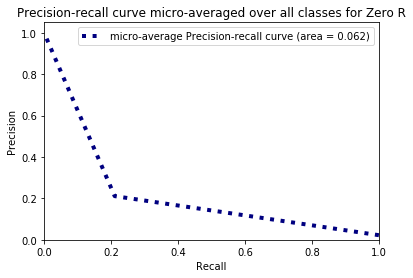

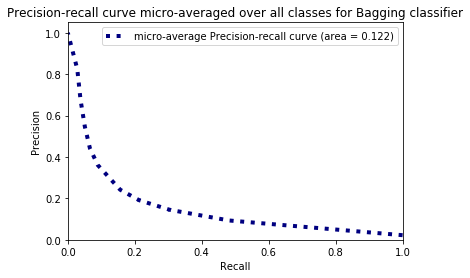

In [19]:
for _, in_dir, title in models:    
    validate(in_dir, X_test, y_test, title)

In [20]:
from scikitplot.estimators import plot_learning_curve

C:\Anaconda Python\data\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda Python\data\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


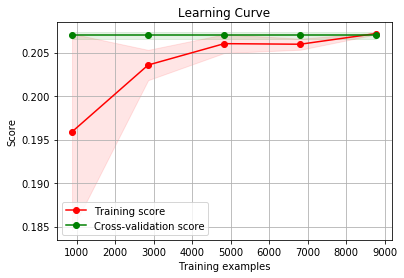

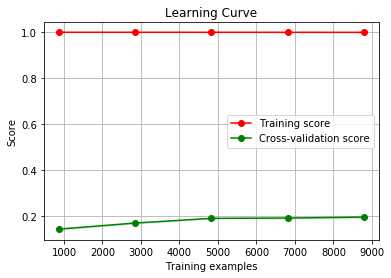

In [21]:
for clr,  out_dir, _ in models:    
    plot_learning_curve(clr, X_train, y_train)


C:\Anaconda Python\data\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda Python\data\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


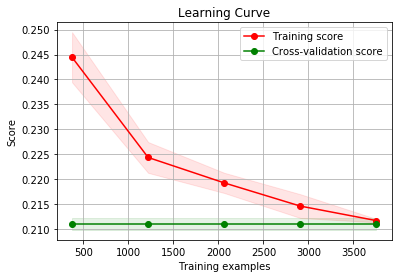

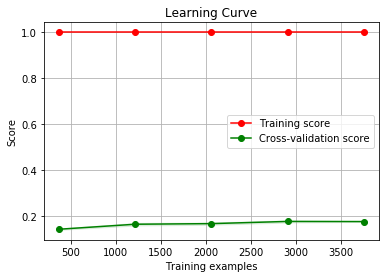

In [22]:
for clr,  out_dir, _ in models:    
    plot_learning_curve(clr, X_test, y_test)